In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [33]:
path = "Data\T1.csv"
df = pd.read_csv(path)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\rudra\AppData\Local\Temp\ipykernel_17852\3410472532.py:1: SyntaxWarning: invalid escape sequence '\T'
  path = "Data\T1.csv"


Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286

In [3]:
df.head()

Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286

In [4]:
df.rename(columns={"Date/Time": "Time",
                   'LV ActivePower (kW)': 'ActivePower(kW)',
                   'Wind Speed (m/s)': 'WindSpeed(m/s)',
                   'Wind Direction (°)': 'Wind_Direction'},
          inplace=True)

In [5]:
df.head()

Time  ActivePower(kW)  WindSpeed(m/s)  \
0  01 01 2018 00:00       380.047791        5.311336   
1  01 01 2018 00:10       453.769196        5.672167   
2  01 01 2018 00:20       306.376587        5.216037   
3  01 01 2018 00:30       419.645905        5.659674   
4  01 01 2018 00:40       380.650696        5.577941   

   Theoretical_Power_Curve (KWh)  Wind_Direction  
0                     416.328908      259.994904  
1                     519.917511      268.641113  
2                     390.900016      272.564789  
3                     516.127569      271.258087  
4                     491.702972      265.674286

In [6]:
df.describe()

ActivePower(kW)  WindSpeed(m/s)  Theoretical_Power_Curve (KWh)  \
count     50530.000000    50530.000000                   50530.000000   
mean       1307.684332        7.557952                    1492.175463   
std        1312.459242        4.227166                    1368.018238   
min          -2.471405        0.000000                       0.000000   
25%          50.677890        4.201395                     161.328167   
50%         825.838074        7.104594                    1063.776283   
75%        2482.507568       10.300020                    2964.972462   
max        3618.732910       25.206011                    3600.000000   

       Wind_Direction  
count    50530.000000  
mean       123.687559  
std         93.443736  
min          0.000000  
25%         49.315437  
50%         73.712978  
75%        201.696720  
max        359.997589

In [7]:
df.isnull().any()

Time                             False
ActivePower(kW)                  False
WindSpeed(m/s)                   False
Theoretical_Power_Curve (KWh)    False
Wind_Direction                   False
dtype: bool

In [8]:
df.isnull().sum()

Time                             0
ActivePower(kW)                  0
WindSpeed(m/s)                   0
Theoretical_Power_Curve (KWh)    0
Wind_Direction                   0
dtype: int64

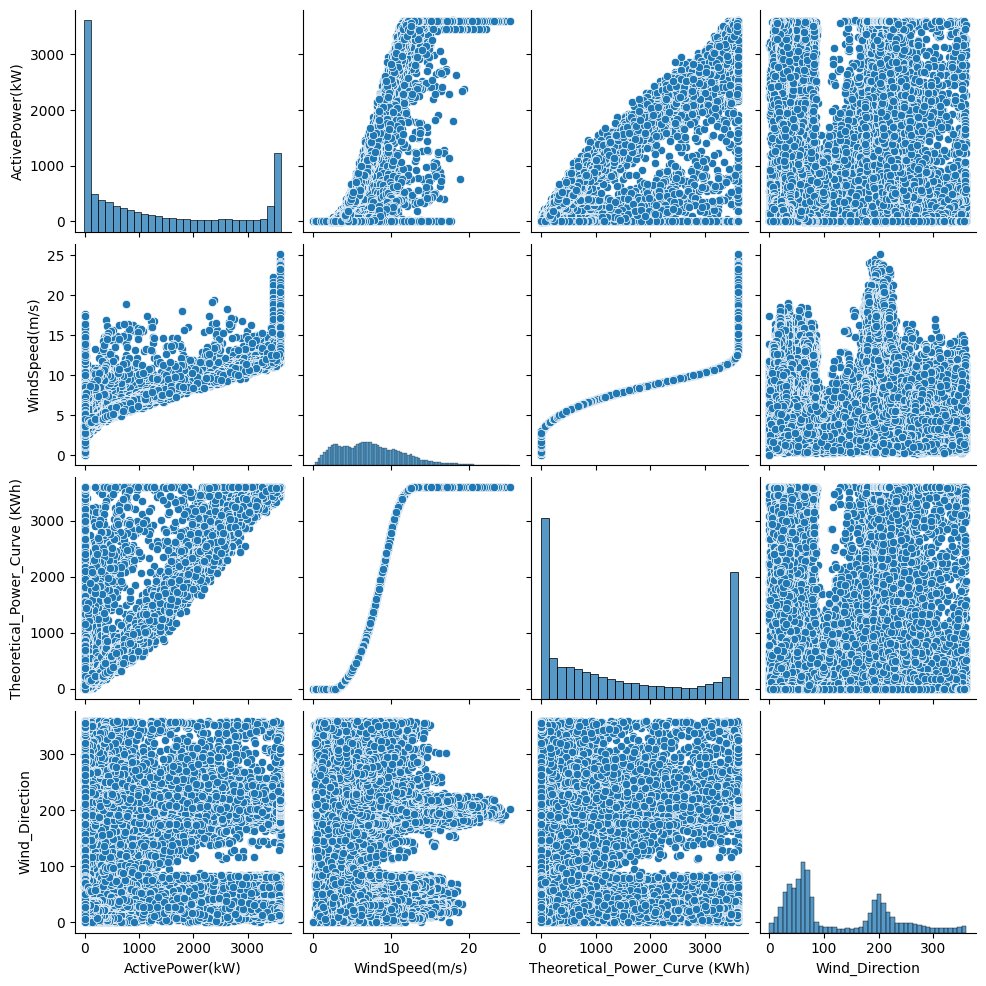

In [9]:
sns.pairplot(df)

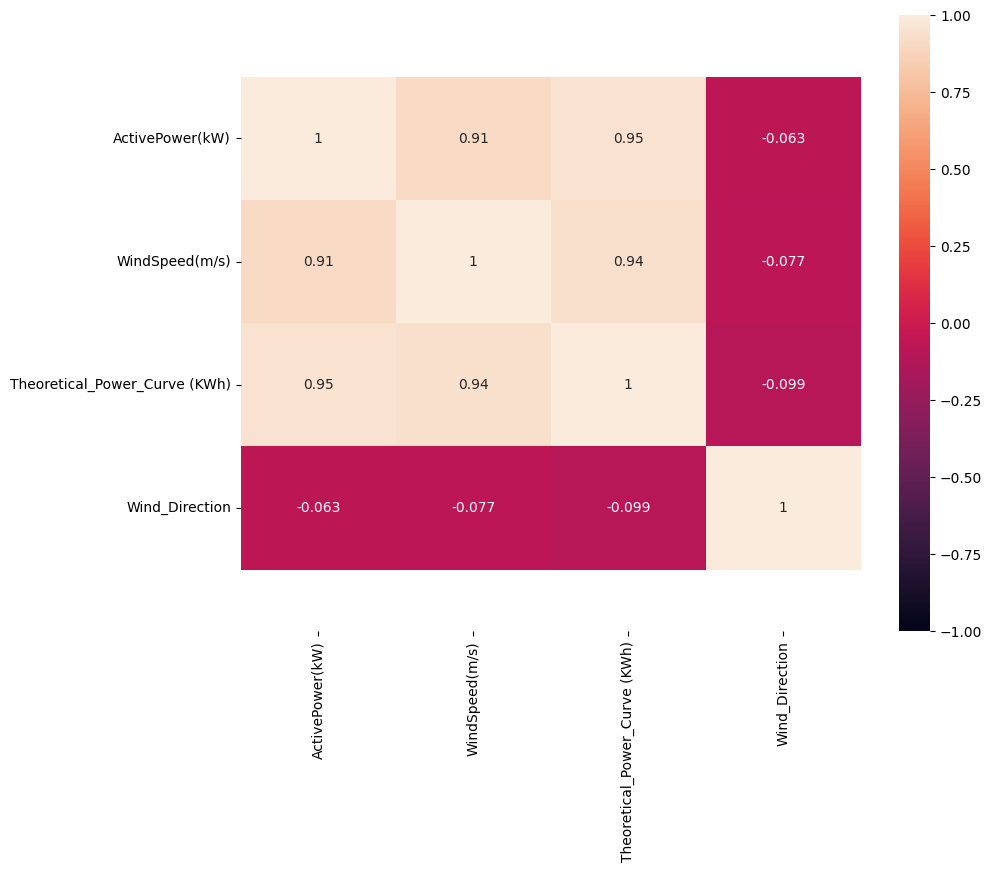

In [10]:
numeric_df = df.select_dtypes(include=[float, int])
plt.figure(figsize=(10,8))
corr = numeric_df.corr()
ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [11]:
print(df.columns)

Index(['Time', 'ActivePower(kW)', 'WindSpeed(m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind_Direction'],
      dtype='object')


In [12]:
y = df[['ActivePower(kW)']]
x = df[['Theoretical_Power_Curve (KWh)','WindSpeed(m/s)']]

In [13]:
names = x.columns
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_scaled = scale.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=names)
x.head()

Theoretical_Power_Curve (KWh)  WindSpeed(m/s)
0                       0.115647        0.210717
1                       0.144422        0.225032
2                       0.108583        0.206936
3                       0.143369        0.224537
4                       0.136584        0.221294

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

def RFR(X_train, X_test, y_train, y_test):
    forest_model = RandomForestRegressor(n_estimators=750,max_depth=4,max_leaf_nodes=500,random_state=42)
    forest_model.fit(X_train,y_train)
    power_preds = forest_model.predict(X_test)
    print(mean_absolute_error(y_test,power_preds))
    print(r2_score(y_test,power_preds))
    return forest_model

forest_model = RFR(X_train,X_test,y_train,y_test)

c:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


168.36716070788
0.9057743710067878


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

def LR(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LinearRegression
    linear_model = LinearRegression()
    linear_model.fit(X_train,y_train)
    print(linear_model.coef_)
    print(linear_model.intercept_)
    y_preds = linear_model.predict(X_test)
    print(mean_absolute_error(y_test,y_preds))
    print(r2_score(y_test,y_preds))
    return linear_model
    

linear_model = LR(X_train,X_test,y_train,y_test)

[[2802.50388868 1152.17613315]]
[-198.35066203]
188.7111236216099
0.8997953576462828


In [25]:
joblib.dump(forest_model, "power_prediction.sav")
joblib.dump(scale, 'scaler.pkl')

['scaler.pkl']